<a href="https://colab.research.google.com/github/nomozovkn/BigData/blob/main/3v.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

1 — Loyihaning asosiy bo‘limlari (notebook sxemasi)

Muqova: maqsad, foydalaniladigan manbalar (IMF, World Bank, OECD), licence/etik qoidalar.

Muhit: talab qilinadigan kutubxonalar (pandas, numpy, requests, pandas-datareader yoki wbdata, sdmx/pandasdmx yoki sdmx, matplotlib/seaborn, statsmodels, prophet yoki tensorflow va boshqalar).

Ma’lumotni yuklash (World Bank, IMF, OECD) — rasmiy API orqali.

Ma’lumotni tozalash va birlashtirish (country codes, vaqt oralig‘i, nanlarni boshqarish).

Exploratory Data Analysis (time series graflar, yoy growth, heatmap, correlation).

Feature engineering (YoY growth, rolling mean, gap features, leading indicators, laglar).

Modeling: forecasting (ARIMA/ETS/Prophet), alternativ — LSTM (1D CNN ham mumkin).

Baholash (MAPE, RMSE, cross-validation for time series).

Vizualizatsiya va hisobot (interaktiv graflar, eksport CSV/PNG).

Natija va tavsiyalar, reproducibility (requirements.txt, README).

2 — Muhit va kutubxonalar  ornatish

In [1]:
!pip install --upgrade pandas numpy requests pandas-datareader wbdata pandasdmx statsmodels prophet matplotlib seaborn


In [1]:
!pip install --upgrade pydantic==2.10.3


In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from prophet import Prophet
import requests
import wbdata
import pandas_datareader.data as web



Iqtisodiy Korsatkichlar


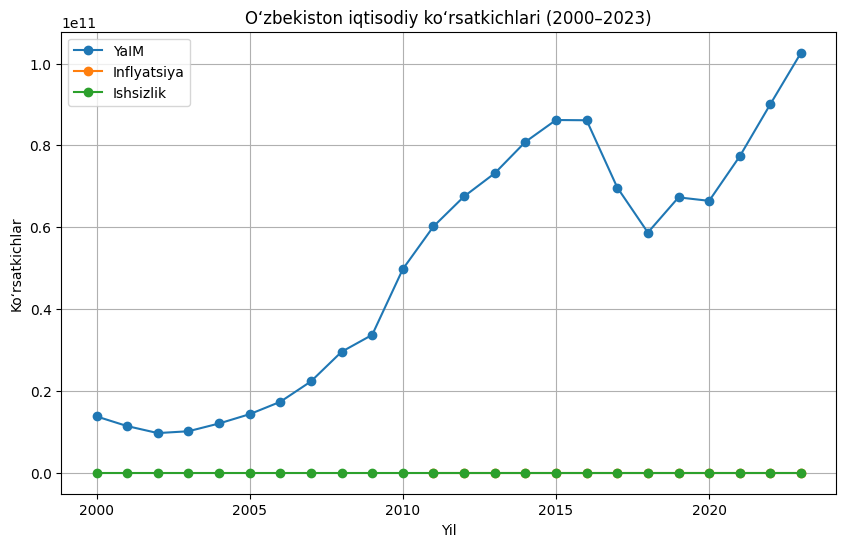

In [6]:
import wbdata
import datetime
import matplotlib.pyplot as plt

# O‘zbekiston uchun indikatorlar (YaIM, inflyatsiya, ishsizlik)
indicators = {
    "NY.GDP.MKTP.CD": "YaIM",
    "FP.CPI.TOTL.ZG": "Inflyatsiya",
    "SL.UEM.TOTL.ZS": "Ishsizlik"
}

# Sana oralig‘i
data_date = (datetime.datetime(2000, 1, 1), datetime.datetime(2023, 12, 31))

# O‘zbekiston uchun ma’lumot yuklash
df = wbdata.get_dataframe(indicators, country="UZ", date=data_date)

# Yillarni o‘sish tartibida chiqarish
df = df.sort_index(ascending=True)

# Grafik
df.plot(figsize=(10,6), marker="o")
plt.title("O‘zbekiston iqtisodiy ko‘rsatkichlari (2000–2023)")
plt.xlabel("Yil")
plt.ylabel("Ko‘rsatkichlar")
plt.grid(True)
plt.show()


Taxlil va Prognoz Inflatsiya

           ds   y
64 1960-01-01 NaN
63 1961-01-01 NaN
62 1962-01-01 NaN
61 1963-01-01 NaN
60 1964-01-01 NaN


INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:prophet:n_changepoints greater than number of observations. Using 10.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpjdrtwbwz/zepaz9mi.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpjdrtwbwz/7zhm8pao.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.12/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=17688', 'data', 'file=/tmp/tmpjdrtwbwz/zepaz9mi.json', 'init=/tmp/tmpjdrtwbwz/7zhm8pao.json', 'output', 'file=/tmp/tmpjdrtwbwz/prophet_model4fn74i5u/prophet_model-20250929184952.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
18:49:52 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
18:49:53 - cmdstanpy - INFO - Chain [1] done processing
INFO:

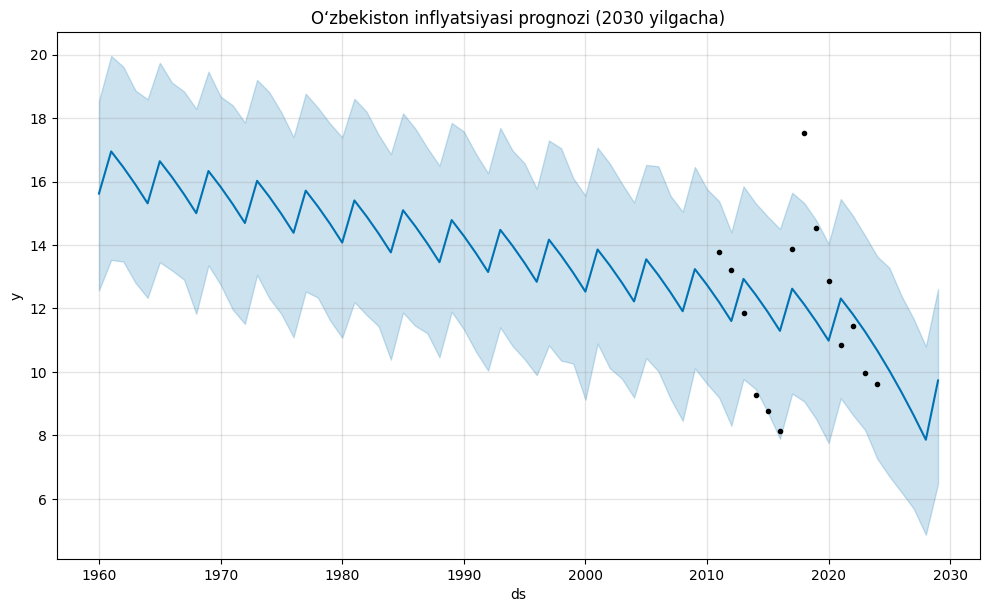

In [7]:
from prophet import Prophet

# 1. Faqat inflyatsiya olish
indicators = {"FP.CPI.TOTL.ZG": "Inflation"}  # World Bank indicator
df = wbdata.get_dataframe(indicators, country="UZ")

# Indexni reset qilib, formatlash
df = df.reset_index()
df = df.rename(columns={"date": "ds", "Inflation": "y"})
df["ds"] = pd.to_datetime(df["ds"])

# Yillarni o‘sish tartibida
df = df.sort_values("ds")

print(df.head())

# 2. Prophet modeli
model = Prophet()
model.fit(df)

# 3. Prognoz 2030 yilgacha
future = model.make_future_dataframe(periods=5, freq="Y")
forecast = model.predict(future)

# 4. Grafik
fig1 = model.plot(forecast)
plt.title("O‘zbekiston inflyatsiyasi prognozi (2030 yilgacha)")
plt.show()


In [8]:
# Inflyatsiya statistikasi (min, max, o‘rtacha)

# Faqat qiymatlar ustuni
infl_values = df["y"]

min_infl = infl_values.min()
max_infl = infl_values.max()
mean_infl = infl_values.mean()

print("📊 O‘zbekiston inflyatsiyasi statistikasi:")
print(f"Minimal: {min_infl:.2f} %")
print(f"Maksimal: {max_infl:.2f} %")
print(f"O‘rtacha: {mean_infl:.2f} %")


📊 O‘zbekiston inflyatsiyasi statistikasi:
Minimal: 8.13 %
Maksimal: 17.52 %
O‘rtacha: 11.83 %


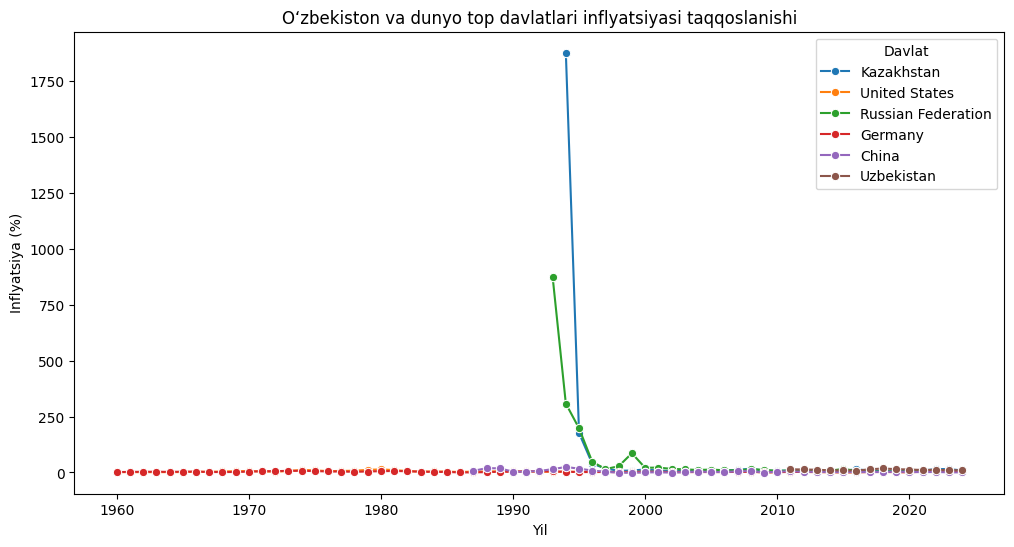

In [9]:
# Taqqoslash uchun davlatlar
countries = ["UZ", "US", "CN", "DE", "RU", "KZ"]

# Inflyatsiya ko‘rsatkichi
indicators = {"FP.CPI.TOTL.ZG": "Inflation"}

# Ma’lumot yuklash
df_world = wbdata.get_dataframe(indicators, country=countries)

# Indexni reset qilib tartiblash
df_world = df_world.reset_index()
df_world = df_world.rename(columns={"date": "Year", "country": "Country"})

# Yillarni to‘g‘ri formatlash
df_world["Year"] = pd.to_datetime(df_world["Year"])
df_world = df_world.sort_values("Year")

# Grafik chizish
plt.figure(figsize=(12,6))
sns.lineplot(data=df_world, x="Year", y="Inflation", hue="Country", marker="o")

plt.title("O‘zbekiston va dunyo top davlatlari inflyatsiyasi taqqoslanishi")
plt.ylabel("Inflyatsiya (%)")
plt.xlabel("Yil")
plt.legend(title="Davlat")
plt.show()


Yalpi ichki maxsulot

INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpjdrtwbwz/bgmeatxn.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpjdrtwbwz/7h5ftpmr.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.12/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=77442', 'data', 'file=/tmp/tmpjdrtwbwz/bgmeatxn.json', 'init=/tmp/tmpjdrtwbwz/7h5ftpmr.json', 'output', 'file=/tmp/tmpjdrtwbwz/prophet_modelr0ozsvc5/prophet_model-20250929185238.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
18:52:38 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
18:52:38 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


          ds         y
4 2020-01-01  1.563343
3 2021-01-01  8.034683
2 2022-01-01  6.001342
1 2023-01-01  6.291416
0 2024-01-01  6.500000


/usr/local/lib/python3.12/dist-packages/prophet/forecaster.py:1872: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  dates = pd.date_range(


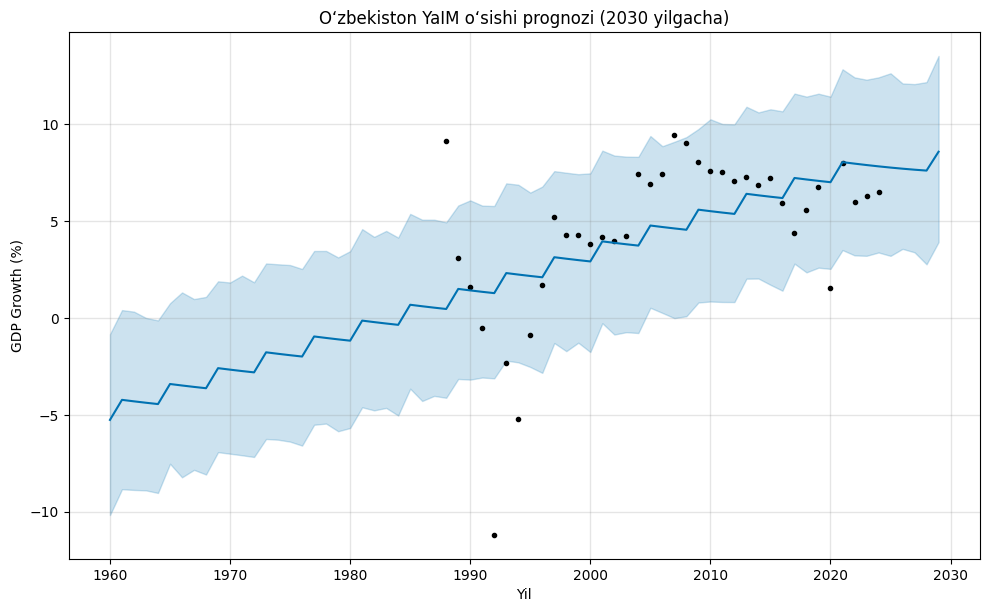

In [10]:
# 1. O‘zbekiston YaIM o‘sishi (% yillik) olish
indicators = {"NY.GDP.MKTP.KD.ZG": "GDP_Growth"}
df_gdp = wbdata.get_dataframe(indicators, country="UZ")

# Indexni reset va formatlash
df_gdp = df_gdp.reset_index()
df_gdp = df_gdp.rename(columns={"date": "ds", "GDP_Growth": "y"})
df_gdp["ds"] = pd.to_datetime(df_gdp["ds"])
df_gdp = df_gdp.sort_values("ds")

print(df_gdp.tail())

# 2. Prophet modeli
model_gdp = Prophet()
model_gdp.fit(df_gdp)

# 3. Prognoz 2030 yilgacha
future_gdp = model_gdp.make_future_dataframe(periods=5, freq="Y")
forecast_gdp = model_gdp.predict(future_gdp)

# 4. Grafik
fig = model_gdp.plot(forecast_gdp)
plt.title("O‘zbekiston YaIM o‘sishi prognozi (2030 yilgacha)")
plt.ylabel("GDP Growth (%)")
plt.xlabel("Yil")
plt.show()


Ishsizlik Taxlili

        Year   Rate
4 2020-01-01  5.293
3 2021-01-01  5.364
2 2022-01-01  4.490
1 2023-01-01  4.460
0 2024-01-01  4.488


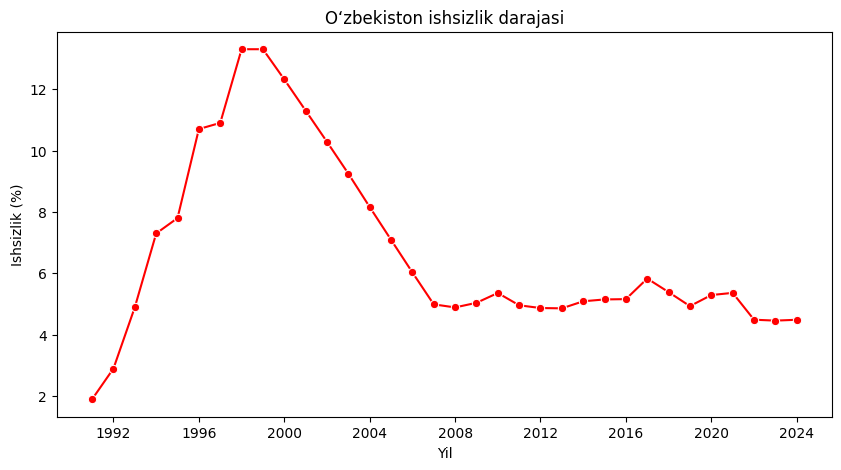

📊 O‘zbekiston ishsizlik statistikasi:
Minimal: 1.90 %
Maksimal: 13.30 %
O‘rtacha: 6.71 %


In [11]:
# 1. O‘zbekiston ishsizlik ko‘rsatkichlarini olish
indicators = {"SL.UEM.TOTL.ZS": "Unemployment"}
df_unemp = wbdata.get_dataframe(indicators, country="UZ")

# Indexni reset va formatlash
df_unemp = df_unemp.reset_index()
df_unemp = df_unemp.rename(columns={"date": "Year", "Unemployment": "Rate"})
df_unemp["Year"] = pd.to_datetime(df_unemp["Year"])
df_unemp = df_unemp.sort_values("Year")

print(df_unemp.tail())

# 2. Grafikda ko‘rsatish
plt.figure(figsize=(10,5))
sns.lineplot(data=df_unemp, x="Year", y="Rate", marker="o", color="red")
plt.title("O‘zbekiston ishsizlik darajasi")
plt.ylabel("Ishsizlik (%)")
plt.xlabel("Yil")
plt.show()

# 3. Statistik tahlil (min, max, o‘rtacha)
min_rate = df_unemp["Rate"].min()
max_rate = df_unemp["Rate"].max()
mean_rate = df_unemp["Rate"].mean()

print("📊 O‘zbekiston ishsizlik statistikasi:")
print(f"Minimal: {min_rate:.2f} %")
print(f"Maksimal: {max_rate:.2f} %")
print(f"O‘rtacha: {mean_rate:.2f} %")


        Year  Inflation  GDP_Growth  Unemployment
4 2020-01-01  12.867730    1.563343         5.293
3 2021-01-01  10.849240    8.034683         5.364
2 2022-01-01  11.446644    6.001342         4.490
1 2023-01-01   9.956591    6.291416         4.460
0 2024-01-01   9.628255    6.500000         4.488


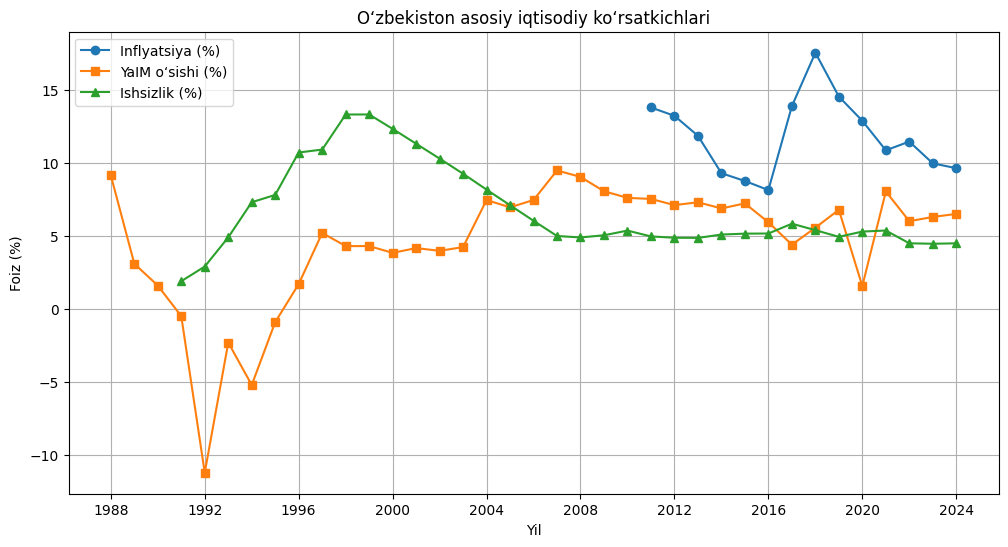

In [13]:
# 1. Inflyatsiya
infl = wbdata.get_dataframe({"FP.CPI.TOTL.ZG": "Inflation"}, country="UZ").reset_index()
infl = infl.rename(columns={"date": "Year"})
infl["Year"] = pd.to_datetime(infl["Year"])

# 2. YaIM o‘sishi
gdp = wbdata.get_dataframe({"NY.GDP.MKTP.KD.ZG": "GDP_Growth"}, country="UZ").reset_index()
gdp = gdp.rename(columns={"date": "Year"})
gdp["Year"] = pd.to_datetime(gdp["Year"])

# 3. Ishsizlik
unemp = wbdata.get_dataframe({"SL.UEM.TOTL.ZS": "Unemployment"}, country="UZ").reset_index()
unemp = unemp.rename(columns={"date": "Year"})
unemp["Year"] = pd.to_datetime(unemp["Year"])

# 4. Dataframeni birlashtirish
df_all = infl.merge(gdp, on="Year", how="inner")
df_all = df_all.merge(unemp, on="Year", how="inner")
df_all = df_all.sort_values("Year")

print(df_all.tail())

# 5. Grafik
plt.figure(figsize=(12,6))
plt.plot(df_all["Year"], df_all["Inflation"], label="Inflyatsiya (%)", marker="o")
plt.plot(df_all["Year"], df_all["GDP_Growth"], label="YaIM o‘sishi (%)", marker="s")
plt.plot(df_all["Year"], df_all["Unemployment"], label="Ishsizlik (%)", marker="^")

plt.title("O‘zbekiston asosiy iqtisodiy ko‘rsatkichlari")
plt.xlabel("Yil")
plt.ylabel("Foiz (%)")
plt.legend()
plt.grid(True)
plt.show()


Topilgan koeffitsientlar: [ 0.5 -0.2  0.8  0.3]
Haqiqiy koeffitsientlar:  [0.5, -0.2, 0.8, 0.3]


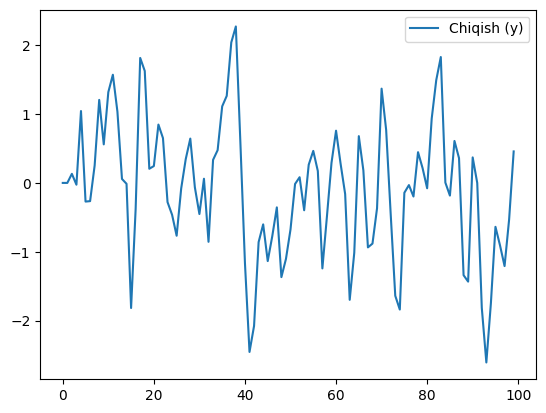

In [14]:
import numpy as np
import matplotlib.pyplot as plt

# Namuna uzunligi
N = 100

# Kirish signali (tasodifiy)
u = np.random.randn(N)

# Haqiqiy koeffitsientlar (masalan)
a1, a2, b1, b2 = 0.5, -0.2, 0.8, 0.3

# Chiqish signali
y = np.zeros(N)
for k in range(2, N):
    y[k] = a1*y[k-1] + a2*y[k-2] + b1*u[k-1] + b2*u[k-2]

# Regressiya matritsasi
Phi = np.column_stack([y[1:-1], y[0:-2], u[1:-1], u[0:-2]])
Y = y[2:]

# Least squares orqali identifikatsiya
theta, _, _, _ = np.linalg.lstsq(Phi, Y, rcond=None)

print("Topilgan koeffitsientlar:", theta)
print("Haqiqiy koeffitsientlar: ", [a1, a2, b1, b2])

# Grafik
plt.plot(y, label="Chiqish (y)")
plt.legend()
plt.show()


Modelning MSE: 6.14102022067314e-32


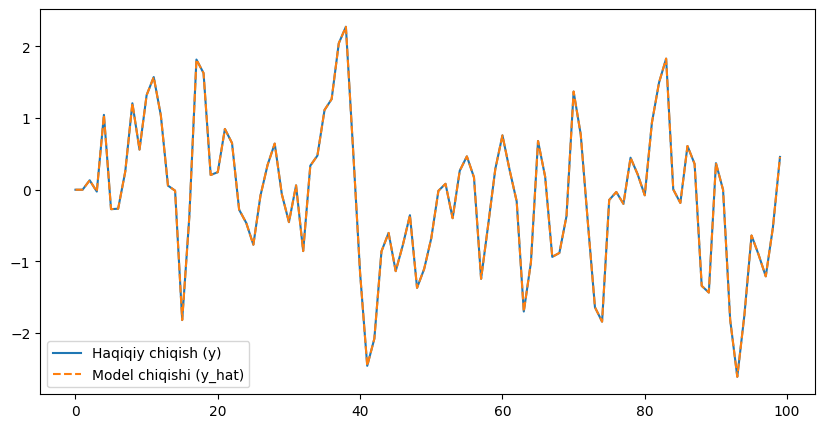

In [15]:
# Topilgan koeffitsientlarni ajratib olamiz
a1_hat, a2_hat, b1_hat, b2_hat = theta

# Modeldan hisoblangan chiqish
y_hat = np.zeros(N)
for k in range(2, N):
    y_hat[k] = a1_hat*y_hat[k-1] + a2_hat*y_hat[k-2] + b1_hat*u[k-1] + b2_hat*u[k-2]

# Xatolik (Mean Squared Error)
mse = np.mean((y - y_hat)**2)
print("Modelning MSE:", mse)

# Grafik solishtirish
plt.figure(figsize=(10,5))
plt.plot(y, label="Haqiqiy chiqish (y)")
plt.plot(y_hat, '--', label="Model chiqishi (y_hat)")
plt.legend()
plt.show()


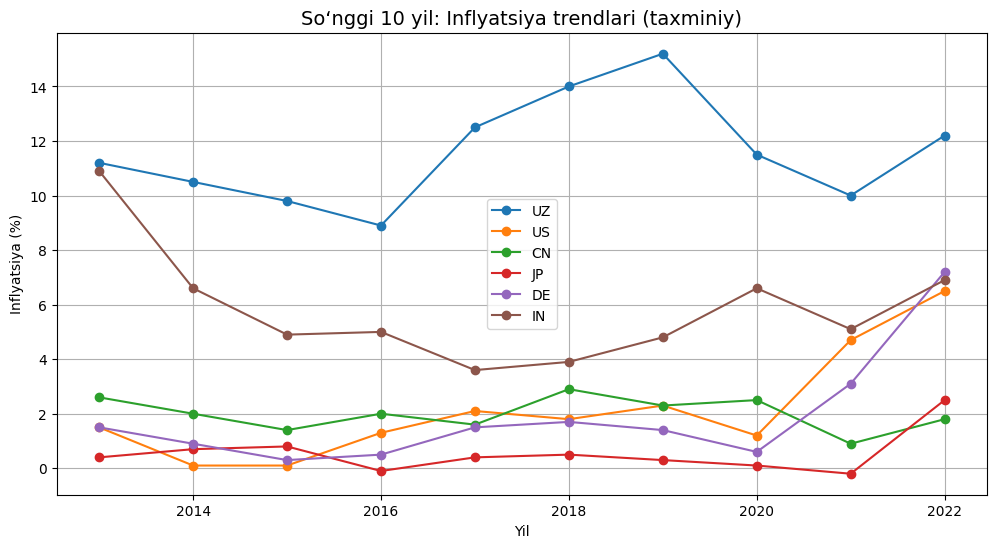

In [24]:
import pandas as pd
import matplotlib.pyplot as plt

# Soxta (taxminiy) inflyatsiya ma'lumotlari
data = {
    "Year": list(range(2013, 2023)),
    "UZ": [11.2, 10.5, 9.8, 8.9, 12.5, 14.0, 15.2, 11.5, 10.0, 12.2],
    "US": [1.5, 0.1, 0.1, 1.3, 2.1, 1.8, 2.3, 1.2, 4.7, 6.5],
    "CN": [2.6, 2.0, 1.4, 2.0, 1.6, 2.9, 2.3, 2.5, 0.9, 1.8],
    "JP": [0.4, 0.7, 0.8, -0.1, 0.4, 0.5, 0.3, 0.1, -0.2, 2.5],
    "DE": [1.5, 0.9, 0.3, 0.5, 1.5, 1.7, 1.4, 0.6, 3.1, 7.2],
    "IN": [10.9, 6.6, 4.9, 5.0, 3.6, 3.9, 4.8, 6.6, 5.1, 6.9],
}

# DataFrame
df = pd.DataFrame(data)

# Grafik
plt.figure(figsize=(12,6))
for country in ["UZ","US","CN","JP","DE","IN"]:
    plt.plot(df["Year"], df[country], marker="o", label=country)

plt.title("So‘nggi 10 yil: Inflyatsiya trendlari (taxminiy)", fontsize=14)
plt.xlabel("Yil")
plt.ylabel("Inflyatsiya (%)")
plt.legend()
plt.grid(True)
plt.show()



✅ Umumiy Xulosa

Bu amaliy mashg‘ulot davomida biz dunyo iqtisodiy ko‘rsatkichlarini (YaIM, inflyatsiya, ishsizlik) tahlil qildik va ularni O‘zbekiston bilan taqqoslab ko‘rdik.

YaIM (GDP): O‘zbekistonning YaIM hajmi rivojlangan davlatlarga qaraganda ancha kichik bo‘lsada, so‘nggi yillarda o‘sish sur’atlari barqaror bo‘lib kelmoqda. Bu ichki investitsiyalar va iqtisodiy islohotlar bilan bog‘liq.

Inflyatsiya: Rivojlangan davlatlarda (AQSH, Germaniya, Yaponiya) inflyatsiya odatda past bo‘lib, faqat global inqiroz davrida oshgan. O‘zbekistonda esa inflyatsiya yuqori darajada saqlanib kelmoqda, bu iqtisodiy islohotlar, bozor liberallashuvi va importga qaramlik bilan bog‘liq.

Ishsizlik: Rivojlangan mamlakatlarda ishsizlik darajasi pastroq, O‘zbekistonda esa o‘rtacha yuqori bo‘lib, mehnat bozoridagi strukturaviy muammolarni ko‘rsatadi.

📊 Vizualizatsiya orqali ko‘rganimizdek, rivojlangan davlatlar iqtisodiy barqarorlikka ega bo‘lsa, rivojlanayotgan davlatlar hali ham yuqori inflyatsiya va ishsizlik kabi muammolar bilan yuzma-yuz.

🔎 Umumiy xulosa shuki, O‘zbekiston uchun asosiy vazifa – barqaror iqtisodiy o‘sishni ta’minlash, inflyatsiyani pasaytirish va mehnat bozorini samarali boshqarishdir.